In [1]:
import numpy as np
import pandas_datareader as pdr
import datetime as dt
import pandas as pd

In [2]:
tickers = ['AAPL', 'MSFT', 'TWTR', 'IBM']
start = dt.datetime(2020, 1, 1)

data = pdr.get_data_yahoo(tickers, start)

In [4]:
data.head()

Attributes  Adj Close                                         Close  \
Symbols          AAPL        MSFT       TWTR         IBM       AAPL   
Date                                                                  
2019-12-31  72.245949  154.749725  32.049999  114.547302  73.412498   
2020-01-02  73.894333  157.615097  32.299999  115.726608  75.087502   
2020-01-03  73.175919  155.652512  31.520000  114.803680  74.357498   
2020-01-06  73.759018  156.054871  31.639999  114.598572  74.949997   
2020-01-07  73.412117  154.631973  32.540001  114.675476  74.597504   

Attributes                                          High              ...  \
Symbols           MSFT       TWTR         IBM       AAPL        MSFT  ...   
Date                                                                  ...   
2019-12-31  157.699997  32.049999  128.145309  73.419998  157.770004  ...   
2020-01-02  160.619995  32.299999  129.464630  75.150002  160.729996  ...   
2020-01-03  158.619995  31.520000  128.432129  75.144997  159.949997  ...   
2020-01-06  159.029999  31.639999  128.202682  74.989998  159.100006  ...   
2020-01-07  157.580002  32.540001  128.288712  75.224998  159.669998  ...   

Attributes        Low                   Open                         \
Symbols          TWTR         IBM       AAPL        MSFT       TWTR   
Date                                                                  
2019-12-31  31.770000  126.577438  72.482498  156.770004  31.860001   
2020-01-02  31.959999  128.843216  74.059998  158.779999  32.310001   
2020-01-03  31.260000  127.686424  74.287498  158.320007  31.709999   
2020-01-06  31.160000  127.342255  73.447502  157.080002  31.230000   
2020-01-07  31.719999  127.533463  74.959999  159.320007  31.799999   

Attributes                   Volume                                     
Symbols            IBM         AAPL        MSFT        TWTR        IBM  
Date                                                                    
2019-12-31  126.701721  100805600.0  18369400.0  11050600.0  3951265.0  
2020-01-02  129.063095  135480400.0  22622100.0  10721100.0  3293436.0  
2020-01-03  127.695984  146322800.0  21116200.0  14429500.0  2482890.0  
2020-01-06  127.552582  118387200.0  20813700.0  12582500.0  2537073.0  
2020-01-07  127.810707  108872000.0  21634100.0  13712900.0  3232977.0  

[5 rows x 24 columns]

In [5]:
data = data['Adj Close']

In [6]:
data

Symbols,AAPL,MSFT,TWTR,IBM
Date,,,,
2019-12-31,72.245949,154.749725,32.049999,114.547302
2020-01-02,73.894333,157.615097,32.299999,115.726608
2020-01-03,73.175919,155.652512,31.520000,114.803680
2020-01-06,73.759018,156.054871,31.639999,114.598572
2020-01-07,73.412117,154.631973,32.540001,114.675476
...,...,...,...,...
2022-02-07,171.660004,300.950012,36.040001,135.606552
2022-02-08,174.830002,304.559998,35.980000,135.389175
2022-02-09,176.279999,311.209991,37.830002,136.149994


In [14]:
portfolio = [.25, .15, .40, .20]

In [15]:
np.sum(portfolio)

1.0

In [16]:
log_return = np.sum(np.log(data/data.shift())*portfolio, axis=1)

In [17]:
log_return

Date
2019-12-31    0.000000
2020-01-02    0.013549
2020-01-03   -0.015701
2020-01-06    0.003534
2020-01-07    0.008801
                ...   
2022-02-07   -0.013263
2022-02-08    0.005376
2022-02-09    0.026481
2022-02-10   -0.022199
2022-02-11   -0.023645
Length: 535, dtype: float64

In [18]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


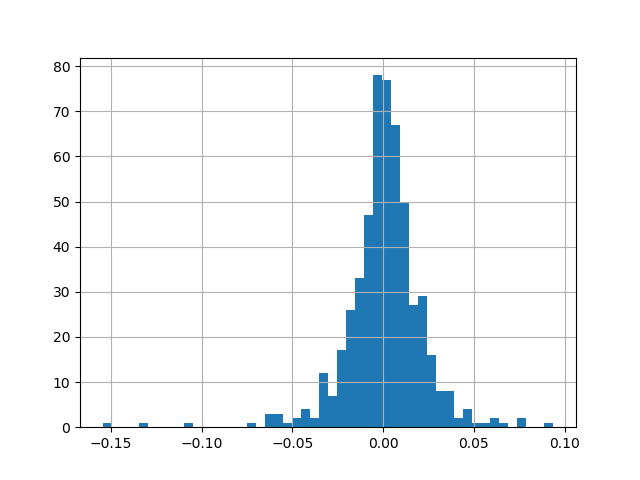

In [19]:
fig, ax = plt.subplots()
log_return.hist(bins=50, ax=ax)

In [20]:
log_return.std()

0.021853527363454934

In [21]:
log_return.mean()

0.0007155706511337178

In [22]:
sharpe_ratio = log_return.mean()/log_return.std()

In [24]:
asr = sharpe_ratio*252**.5

In [25]:
asr

0.5197939784025057